In [ ]:
import keras
keras.__version__
import numpy as np

In [3]:

timesteps = 100 # 입력 시퀀스에 있는 
input_features = 32 # 입력 특성의 차원
output_features = 64 # 출력 특성의 차원

inputs = np.random.random((timesteps, input_features)) # 입력데이터 : 에제를 위해 생성한난수
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

for input_t in inputs : 
    output_t = np.tanh(np.dot(W,input_t) + np.dot(U,state_t)+b)
    successive_outputs.append(output_t)
    state_t = output_t
    
final_ouput_sequence = np.stack(successive_outputs, axis=0)


In [26]:
final_ouput_sequence

array([[1.        , 1.        , 0.99999998, ..., 0.99999943, 0.99999998,
        0.99999982],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [6]:
inputs

array([[0.51914184, 0.32940994, 0.59530951, ..., 0.51296021, 0.55008209,
        0.01347196],
       [0.31580398, 0.75888441, 0.05658   , ..., 0.60140637, 0.52319937,
        0.29443579],
       [0.64467443, 0.21391338, 0.8849955 , ..., 0.69704096, 0.42717525,
        0.57285439],
       ...,
       [0.64994778, 0.79211203, 0.59734719, ..., 0.79184451, 0.61658211,
        0.67069279],
       [0.1866008 , 0.83297628, 0.27605585, ..., 0.86426099, 0.85072825,
        0.30747783],
       [0.11676073, 0.25773625, 0.67655338, ..., 0.08863619, 0.29700265,
        0.82947592]])

## 케라스의 순환층
### 출처 [이수안 컴퓨터연구소](https://www.youtube.com/watch?v=13HOC0z6WLM)
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [7]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32)) # 2D 텐서 반환 : 입력 시퀀스에 대한 마지막 출력만 반환
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) #3D텐서 반환 : 타임스텝의 출력을 모은 전체 시퀀스를 반환 -> 또 다른 레이어 쌓을 때 사용 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


# IMDB 데이터 적용

In [11]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수, 단어 1만개 
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다) -> 단어 수
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) 
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...


/Users/icehongssii/opt/anaconda3/envs/dev_t/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/icehongssii/opt/anaconda3/envs/dev_t/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [14]:
print(input_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

# 모델 구성

In [15]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32)) # 사용 할 단어 수, 32차원 아웃풋
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid')) # 최종결과확인 위한 dense, 그리고 true & false 위한 sigmoid

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.5799 - acc: 0.6841 - val_loss: 0.4919 - val_acc: 0.7700
Epoch 2/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.3646 - acc: 0.8442 - val_loss: 0.4460 - val_acc: 0.8088
Epoch 3/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.2826 - acc: 0.8865 - val_loss: 0.4675 - val_acc: 0.7772
Epoch 4/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2223 - acc: 0.9175 - val_loss: 0.3598 - val_acc: 0.8702
Epoch 5/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.1680 - acc: 0.9388 - val_loss: 0.4719 - val_acc: 0.7828
Epoch 6/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1213 - acc: 0.9580 - val_loss: 0.4089 - val_acc: 0.8402
Epoch 7/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.0877 - acc: 0.9724 - val_loss: 0.5332 - val_acc

이제 훈련과 검증의 손실과 정확도를 그래프로 그립니다:

In [22]:
import matplotlib.pyplot as plt

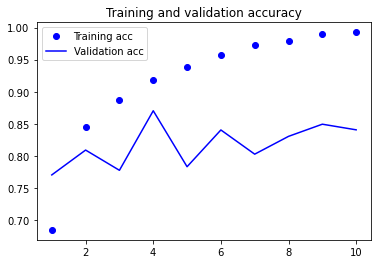

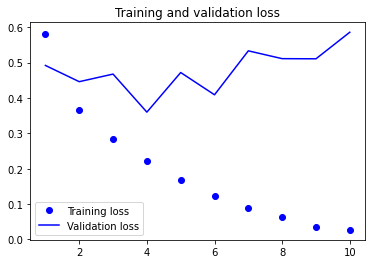

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
model.evaluate(input_test, y_test)

25000/25000 [==============================] - 31s 1ms/step


[0.6091304480695724, 0.8349199891090393]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음



# 케라스를 사용한 LSTM 예제

## LSTM과 GRU 레이어

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem) -> 데이터가 길면 길수록 
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



In [25]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 172s 9ms/step - loss: 0.5121 - acc: 0.7544 - val_loss: 0.3441 - val_acc: 0.8628
Epoch 2/10
20000/20000 [==============================] - 169s 8ms/step - loss: 0.2995 - acc: 0.8838 - val_loss: 0.3118 - val_acc: 0.8706
Epoch 3/10
20000/20000 [==============================] - 171s 9ms/step - loss: 0.2405 - acc: 0.9089 - val_loss: 0.4016 - val_acc: 0.8526
Epoch 4/10
20000/20000 [==============================] - 172s 9ms/step - loss: 0.2041 - acc: 0.9257 - val_loss: 0.3100 - val_acc: 0.8760
Epoch 5/10
20000/20000 [==============================] - 175s 9ms/step - loss: 0.1729 - acc: 0.9384 - val_loss: 0.3273 - val_acc: 0.8884
Epoch 6/10
20000/20000 [==============================] - 181s 9ms/step - loss: 0.1620 - acc: 0.9424 - val_loss: 0.3664 - val_acc: 0.8830
Epoch 7/10
20000/20000 [==============================] - 178s 9ms/step - loss: 0.1412 - acc: 0.9500 - val_loss: 0.4957 - v

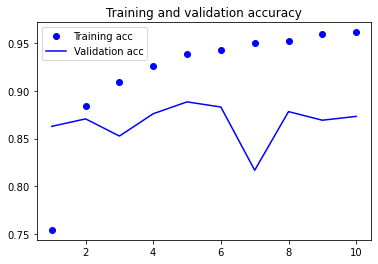

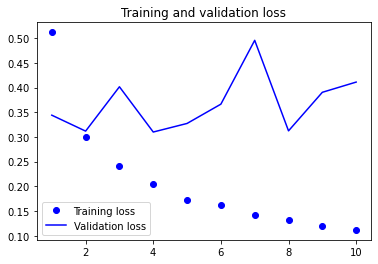

In [27]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()